<a href="https://colab.research.google.com/github/ChicagoDataScientist/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Sales for the past week
import seaborn as sns
n_num = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# Calculate mean
def mean(first_data_values):

    return sum(first_data_values) / len(first_data_values)

# Calculate variance

def variance(values):

    meanval = mean(values)
    return mean([(i-meanval) ** 2 for i in values])

# Calculate standard deviation
def std(values):

    return (variance(values)) ** (1/2)  


In [64]:
# The mean of last week's sales:

m1 = mean(n_num)
print("The mean of last week's sales is: " + str(m1)) 

The mean of last week's sales is: 3052.714285714286


In [65]:
# The variance of last week's sales:

v1 = variance(n_num)
print("The variance of last week's sale is: "+ str(v1))

The variance of last week's sale is: 183761.06122448976


In [66]:
# The standard deviation of last week's sales:

s1 = std(n_num)
print("The standard deviation of last week's sale is: "+ str(s1))

The standard deviation of last week's sale is: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np


In [74]:
# find out covariance with respect  columns 

x = n_num
y = [127, 80, 105, 92, 120, 115, 93] 
cov_mat = np.stack((x, y), axis = 0)  
  
print(np.cov(cov_mat)) 

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


In [75]:
# Double check my work!

df = pd.DataFrame({"sales":x, "customers":y})

df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [68]:
x = n_num
y = [127, 80, 105, 92, 120, 115, 93] 
mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / len(x)

6518.020408163265

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [69]:
# The standard deviation of last week's customers:

c1 = std(y)
print("The standard deviation of last week's customers is: "+ str(c1))

The standard deviation of last week's customers is: 15.792015549069118


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [70]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
import pandas as pd
df = pd.read_csv (url)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [71]:

colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['Unnamed: 0',
 'pclass',
 'survived',
 'age',
 'sibsp',
 'parch',
 'fare',
 'body',
 'has_cabin_number']

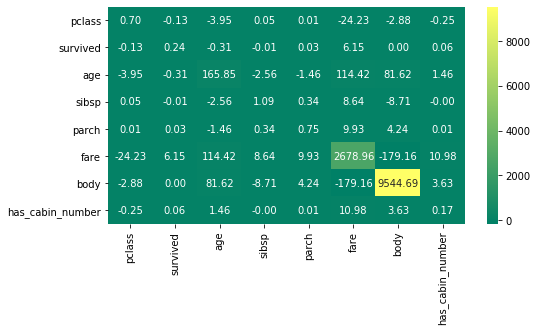

In [72]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
cov_numeric = sns.heatmap(df[["pclass", "survived", "age", "sibsp","parch","fare", "body", "has_cabin_number"]].cov(),
                           annot=True, fmt = ".2f", cmap = "summer")

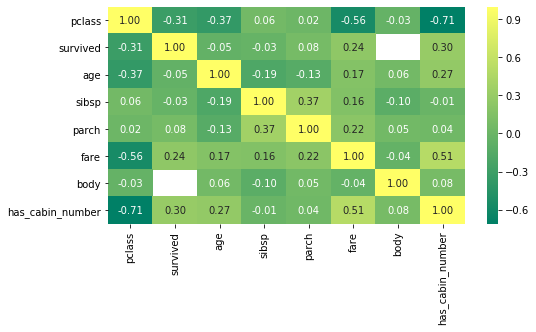

In [73]:
# Correlation matrix between numerical values
import seaborn as sns
plt.figure(figsize=(8,4))
corr_numeric = sns.heatmap(df[["pclass", "survived", "age", "sibsp","parch","fare", "body", "has_cabin_number"]].corr(),
                           annot=True, fmt = ".2f", cmap = "summer")

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

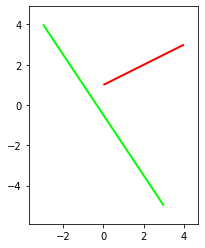

In [49]:
import pylab as pl
from matplotlib import collections  as mc
lines = [[(0, 1), (4, 3)], [(-3, 4), (3, -5)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
ax.set_aspect('equal')

## Perpendicular is a synonym for orthogonal


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [50]:

dot_product = ((-5)*(6))+((3)*(-8))+((7)*(-2))
dot_product

-68

## The vectors are not orthogonal because the cross product $\neq$ 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [51]:
import math
length = math.sqrt(2**2 + 15**2 + 6**2 + 20**2)
lenth_squared = length**2
print("The length of c squared is", lenth_squared)

The length of c squared is 665.0


In [26]:
c=np.array([2,-15,6,20])
dot_product = np.dot(c, c)
print("The dot product of x and y is", dot_product)

The dot product of x and y is 665


In [0]:
import pandas as pd

c_transposed = c.T

In [46]:
t1 = np.matmul(c, c_transposed)
print("The vector times its transpose is", t1)

The vector times its transpose is 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
 = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix}
+12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
= 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix}
+11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix}
-8 \begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
f_hat = f / (f**2).sum()**0.5
f_hat

$\hat{f} = \begin{bmatrix} 0.20908335  & 0.62725005 &  0.57497921 &  0.47043754 &  0.10454167 \end{bmatrix}$

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [0]:
soa = np.array([[0, 0, 3, 2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
plt.xlim(-1,10)          
plt.ylim(-1,10)

blue = np.multiply(3.14, soa)
green = np.multiply(2, soa)
orange = np.multiply(2.7, soa)

plt.arrow(0,0, green[0,2], green[0,3], head_width=.2, head_length=0.2, color ='green')
plt.arrow(1.5,2, 0, 6, head_width=.2, head_length=0.2, color ='orange')
plt.arrow(2,3, 5, 6, head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, 3, 2, head_width=.05, head_length=0.05, color ='black')
plt.draw()
plt.show()

## The black and green vectors are linearly dependent.
## The orange and red vectors are linearly independent.

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [22]:
# The vectors are dependent, so their span is the infinite line they both lie on.

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [48]:
lmn = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])
np.linalg.matrix_rank(lmn)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
plt.quiver([0, 0], [0, 0], [1, 2], [2, 1], angles='xy', scale_units='xy', scale=1)
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

The vectors (1,2) and (2,1) are linearly independent, and because dim(R2)=2 we can conclude that span((1,2),(2,1))=R2, i.e., the set {(1,2),(2,1)} is a basis for R2

## 6.2 What does it mean to form a basis?

The elements of a basis are called basis vectors. Equivalently B is a basis if its elements are linearly independent and every element of V is a linear combination of elements of B. In more general terms, a basis is a linearly independent spanning set

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])
np.linalg.matrix_rank(p)

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tell us the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# This was a stretch goal!!!

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()